# Sympy 2 -- Application to Newton's method

In this notebook we will focus on applying Sympy to accomplish a task. We will use it to set up Newton's method, comparing our initial point to the roots Newton's method (eventually) finds.

* * * 

Newton's method is the technique of iteratively using the linear approximation of a function to search for roots.  Say we want to find a solution to the equation

$$f(x) = 0$$

where, $f$ is a real-valued function of a real variable $f : \mathbb R \to \mathbb R$.

Start with an initial guess $x_0 \in \mathbb R$. The linear approximation $L$ at $x_0$ (to $f$) is the function

$$L_{x_0}(x) = f(x_0) + f'(x_0)(x-x_0).$$

Rather than trying to solve $f(x)=0$ we solve $L_{x_0}(x)=0$, which gives us

$$x = x_0-\frac{f(x_0)}{f'(x_0)}.$$

Newton's method is the process of replacing the initial guess $x_0$ with the solution to $L_{x_0}(x) = 0$, i.e. 

$$x_0 \longmapsto x_0-\frac{f(x_0)}{f'(x_0)}.$$

The function that sends $x_0$ to $x_0 -\frac{f(x_0)}{f'(x_0)}$ is called the **Newton iterate**, let's call this function $N_f$, i.e.

$$N_f(x) = x - \frac{f(x)}{f'(x)}.$$

* * *

For example, if $f(x) = x^2 - c$, then solving $f(x) = 0$ is equivalent to computing a square root of $c$.  On the other hand, the *Newton iterate* is the function

$$N_f(x) = x - \frac{x^2 - c}{2x} = \frac{x}{2} + \frac{c}{2x}.$$

This illustrates the compromise made with Newton's method: if one does not have a convenient direct way to compute square roots, one can get a good approximation by iteratively computing $N_f$, which uses only the operations of addition, multiplication and division. 

* * *

As an initial exercise, let's use Sympy to compute the Newton iterates of functions.  We will then make a plot of $f$, $N$ as well as applications of the Newton iterate to some initial guesses. 


In [5]:
import sympy as sp

x = sp.Symbol('x')
f = sp.Function('f')

N = x - f(x)/f(x).diff(x)
sp.pprint(f)
print("\nNewton iterator: ")
sp.pprint(N)

f

Newton iterator: 
      f(x)  
x - ────────
    d       
    ──(f(x))
    dx      


In [9]:
## Let's make f = x^2 - c

c = sp.Symbol('c')

## Newton iterator for square roots
Nsq = sp.simplify(N.subs(f(x), x**2-c).doit())
sp.pprint(Nsq)

     2
c + x 
──────
 2⋅x  


In [11]:
## Let's make c=2, and try finding sqrt(2).

Nsq2 = Nsq.subs(c, 2)
sp.pprint(Nsq2)

## newton iterator as callable function
IT = sp.lambdify(x, Nsq2)
print(IT(1))

 2    
x  + 2
──────
 2⋅x  
1.5


In [12]:
xi = 1.0
for i in range(10):
    print("Iterate i=",i," ",xi)
    xi = IT(xi)
    

Iterate i= 0   1.0
Iterate i= 1   1.5
Iterate i= 2   1.4166666666666667
Iterate i= 3   1.4142156862745099
Iterate i= 4   1.4142135623746899
Iterate i= 5   1.414213562373095
Iterate i= 6   1.414213562373095
Iterate i= 7   1.414213562373095
Iterate i= 8   1.414213562373095
Iterate i= 9   1.414213562373095


In [13]:
print(xi**2)

1.9999999999999996


In [14]:
print(round(xi**2, 6))

2.0


### Next

Let's create a callable function that takes as input a function $f$, and an initial guess, and plots the outcome of Newton's method. 

Before we tackle this problem let's just do it once for the above function $$x^2 -c. $$

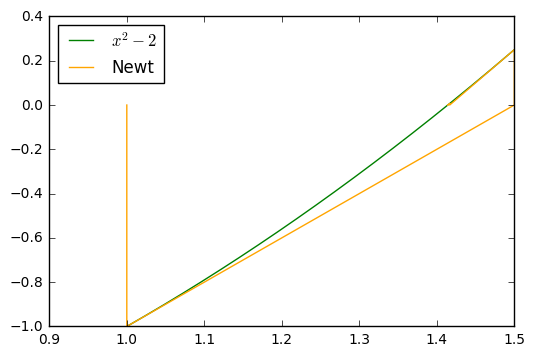

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


F = sp.lambdify(x, x**2 -2)
fig, ax = plt.subplots()

xl = [1.0]
yl = [0.0]
for i in range(4):
        xl.append(xl[-1])
        yl.append(F(xl[-1]))
        xl.append(IT(xl[-1]))
        yl.append(0.0)

dom = np.linspace(min(xl), max(xl), 1000)
plt.plot(dom, [F(x) for x in dom], color="green", label="$x^2-2$")
plt.plot(xl, yl, color="orange", label="Newt")

legend = ax.legend(loc="upper left")
plt.show()

In [67]:
## f input function
## x is the variable name
## x0 initial root guess
## n max number of iterations
## legloc legend location string
def plotNewt(f, x, x0, n, legloc):
    N = x - f/f.diff(x)
    F = sp.lambdify(x, f)
    IT = sp.lambdify(x, N)
    
    fig, ax = plt.subplots()
    xl = [x0]
    yl = [0.0]
    
    for i in range(n):
        xl.append(xl[-1])
        yl.append(F(xl[-1]))
        xl.append(IT(xl[-1]))
        yl.append(0.0)
        
    dom = np.linspace(min(xl)-0.5, max(xl)+0.5, 1000)
    ax.grid(color='b', linestyle='-', linewidth=0.2)

    plt.plot(dom, [F(x) for x in dom], color="green",\
             label="$"+sp.latex(f)+"$")
    plt.plot(xl, yl, color="orange", label="Newt")
    #plt.plot([min(xl), max(xl)], [0.0, 0.0], color="black")
    plt.plot([xl[0]], [yl[0]], 'ro')
    plt.plot([xl[-1]], [yl[0]], 'bo', label=("%1.4f endpt" % xl[-1]))
    
    legend = ax.legend(loc=legloc)
    plt.show()
    

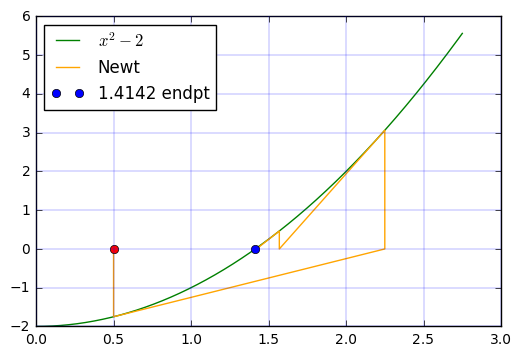

In [68]:
plotNewt(x**2-2, x, 0.5, 8, "upper left")

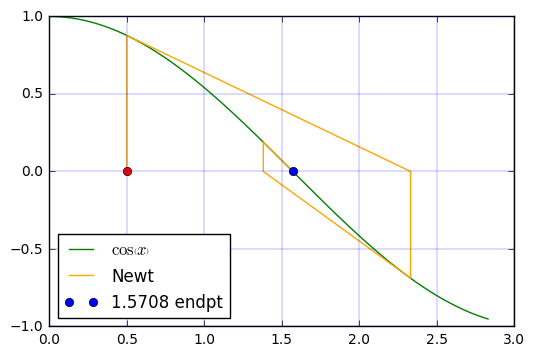

In [69]:
plotNewt(sp.cos(x), x, 0.5, 8, "lower left")


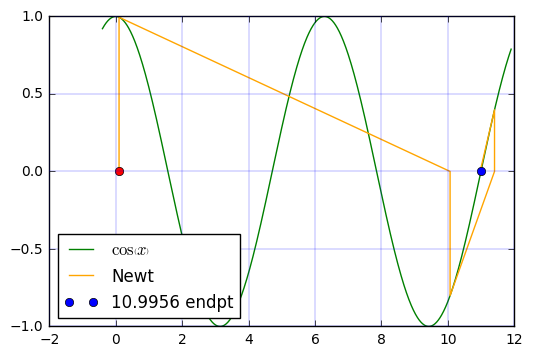

In [70]:
plotNewt(sp.cos(x), x, 0.1, 8, "lower left")


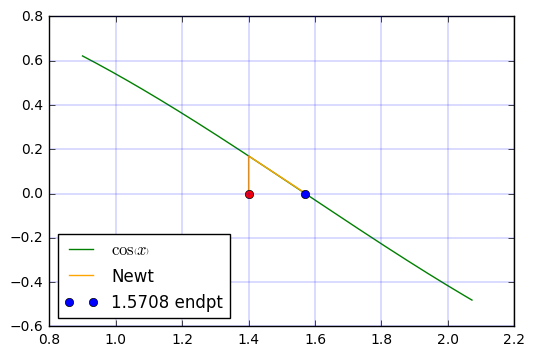

In [71]:
plotNewt(sp.cos(x), x, 1.4, 8, "lower left")


## General observations

(1) If you are reasonably-close to a root, Newton's method finds it rather quickly. 

(2) If you are "far" from any roots, Newton's method might throw you close to a root far far away. 

(1) is backed-up by a theorem. Kantorovich Theorem (see wikipedia).

(2) is perhaps less well understood. 


$$ x^3 -x = x(x^2-1) = x(x-1)(x+1)$$

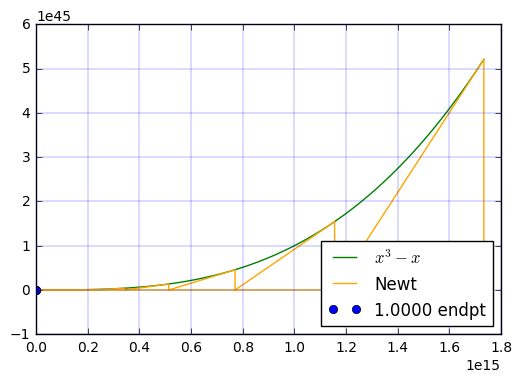

In [78]:
plotNewt(x**3-x, x, 1/np.sqrt(3), 100, "lower right")

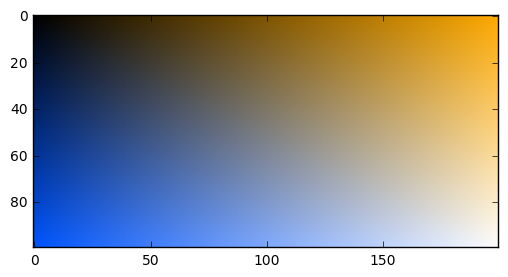

In [82]:
xmax = 200
ymax = 100

imarr = [[[i/xmax, (i+j)/(xmax+ymax), j/ymax]\
          for i in range(xmax)] for j in range(ymax)]

plt.imshow(imarr)